## About this homework 


Here, my goal is to help you with a simple problem of image recognition, with just a little bit of code, and no maths. Input is some images containing differnt handwritten numbers from 0 to 9 and we must train a classifier that can decide about classifying a new image to one of these 10 classes. 

You should as well as completing this file, write a report containing the answers to all the questions in this notebook.

After the assignment, you will learn: 

* how to access and validate the training data for your network,
* how to create and train your network
* how to use the trained and test its performance.



## The digits dataset

scikit-learn comes with several test datasets. Let's load the handwritten digits dataset:

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In python, the `dir` function returns the names of the attributes of an object, in other words which information is stored in the object in the form of other objects. Let's use this function to check what can be found in the digits object:

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Let's have a look in more details at some of these attributes. We are going to start by checking their type:

In [3]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


`images` and `target` are ndarrays (N-dimensional arrays) from the numpy package. The shape attribute of an ndarray gives the number of dimensions and the size along each dimension of the array. For example:

In [4]:
digits.images.shape

(1797, 8, 8)

digits.image is an array with 3 dimensions. The first dimension indexes images, and we see that we have 1797 images in total. The next two dimensions correspond to the x and y coordinates of the pixels in each image. Each image has 8x8 = 64 pixels. In other words, this array could be represented in 3D as a pile of images with 8x8 pixels each. 

let's look at the data of the first 8x8 image. Each slot in the array corresponds to a pixel, and the value in the slot is the amount of black in the pixel

In [5]:
print(digits.images[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


Now let's display this image: (sometimes, the plot does not appear, just rerun this cell if you don't see the image)

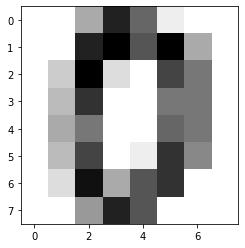

In [6]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

The image is low resolution. The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn to make it easier and faster to train a machine learning algorithm to recognize these digits. 

Now let's investigate the target attribute: 

In [7]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


It is a 1-dimensional array with 1797 slots. Looking into the array, we see that it contains the true numbers corresponding to each image. For example, the first target is 0, and corresponds to the image drawn just above. 

Let's have a look at some more images using this function: 

In [8]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

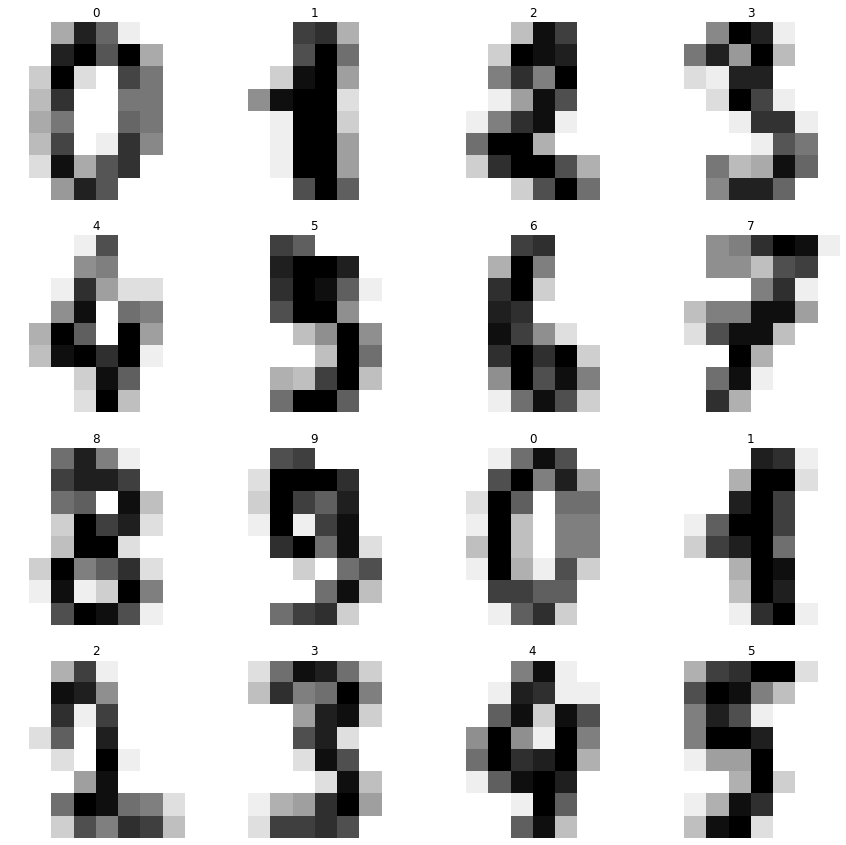

In [9]:
plot_multi(0)

you can have a look at the next digits by calling `plot_multi(16)`, `plot_multi(32)`, etc. You will probably see that with such a low resolution, it's quite difficult to recognize some of the digits, even for a human. In these conditions, our neural network will also be limited by the low quality of the input images. Can the neural network perform at least as well as a human? It would already be an achievement! 

## Building the network and preparing the input data

With [scikit-learn](https://scikit-learn.org), creating, training, and evaluating a neural network can be done with only a few lines of code. 

We will make a very simple neural network, with three layers. At first we choose a hidden layer with 15 neurons. We could choose a different number, and also add more hidden layers with different numbers of neurons. we will test different setting later.

based on the number of pixels in images and the problem determine the appropriate number of neurons in hidden and ouput layers. Write these number and your reason in the word file that is your report.


This is a *dense* neural network, which means that each node in each layer is connected to all nodes in the previous and next layers. 

![Simple dense network](https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/simple_dense.png)

The input layer requires a 1-dimensional array in input, but our images are 2D. So we need to flatten all images:

In [10]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

We now have 1797 flattened images. The two dimensions of our 8x8 images have been collapsed into a single dimension by  writing the rows of 8 pixels as they come, one after the other. The first image that we looked at earlier is now represented by a 1-D array with 8x8 = 64 slots. Please check that the values below are the same as in the original 2-D image. 

In [11]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

let's now split our data into a training sample and a testing sample:

In [12]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

The first 1000 images and labels are going to be used for training. The rest of the dataset will be used later to test the performance of our network. 

We can now create the neural network. We use one hidden layers with 15 neurons, and scikit-learn is smart enough to find out how many numbers to use in the input and output layers. 

Import appropriate function and use it to complete the following box.  

for the first run set the other parameters as these:

activation='logistic', alpha=1e-4, solver='sgd', tol=1e-4, random_state=1,learning_rate_init=.1, verbose=True

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix


mlp = MLPClassifier(hidden_layer_sizes=(15), activation='logistic', alpha=1e-4, solver='sgd', tol=1e-4, random_state=1,learning_rate_init=.1, verbose=True)

Finally, we can train the neural network, use the appropriate function.

In [14]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=15,
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

The training will be extremely fast because the neural network is simple and the input dataset is small. Now that the network has been trained, let's see what it can say about our test images and print it in your report for the first 50 images in test sample.

In [15]:
predict_test = mlp.predict(x_test[0:50])

print(mlp.score(x_test[0:50], y_test[0:50]))

print(classification_report(y_test[0:50],predict_test))

0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         7
           5       0.86      1.00      0.92         6
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      0.67      0.80         6

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.97      0.96      0.96        50



These predictions should be fairly close to the targets of our training sample. Let's check by eye. please compare the values of these arrays by printing the true labels for the 1st 50 images in the test sample.

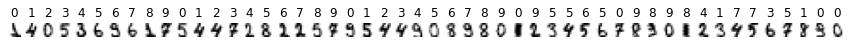

[1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0]


In [16]:
def plot_multi():
    '''Plots 50 digits, starting with digit i'''
    nplots = 50
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(1,50,j+1)
        plt.imshow(x_test[j].reshape(8,8), cmap='binary')
        plt.title(digits.target[j])
        plt.axis('off')
    plt.show()
    
plot_multi()
print(y_test[0:50])

But can we be a bit more quantitative? We can compute the accuracy of the classifier, which the probability for a digit to be classified in the right category. Again, scikit-learn comes with a handy tool to do that. write the ouput in your report.

In [17]:
predications = mlp.predict(x_test)
predications[0:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predications)

0.9146800501882058

This number is the probability for the digits in the test sample to be classified in the right category. 

**We managed to get this accuracy with this very simple neural network. Not too bad!**

However, this is only a first try. 
Now please change different parameters and discuss in your report about the effect of changing these parameters. (numer of hidden layer neuruns, learning rate, the method of solver and activation function, ...)

Your grade for this homework mainly is dependent to your complete report.
